In [6]:
%matplotlib inline
import glymur
from IPython.display import Image
import matplotlib.pyplot as plt
from pathlib import Path
from glob import glob
import numpy as np
import json, os
from glob import glob

In [8]:
config = json.load(open(os.path.expanduser("~/.thesis.conf")))
root = Path(config['datasets']) / Path("archive_org/") 
jp2_files = glob(str(root / '*'/ '*.jp2'))

In [10]:
# name = "artofavantgardei00rowe"
# db_path = Path("/media/jakob/bigdata/datasets/archive_org/")
# jp2_folder = db_path / "*" / ("*" + "_jp2")
# files = glob((str(jp2_folder / "*.jp2")))

In [11]:
page = glymur.Jp2k(jp2_files[0])

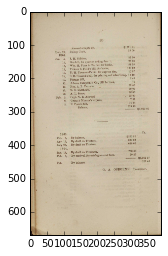

In [16]:
plt.imshow(page[::8,::8])

In [19]:
header = page.get_codestream()
page.box

[glymur.jp2box.JPEG2000SignatureBox(),
 glymur.jp2box.FileTypeBox(brand='jp2 ', minor_version=0, compatibility_list=['jp2 ']),
 glymur.jp2box.JP2HeaderBox(box=[glymur.jp2box.ImageHeaderBox(5350, 3134, num_components=3, signed=False, bits_per_component=8, compression=7, colorspace_unknown=True, ip_provided=False), glymur.jp2box.ColourSpecificationBox(method=1, precedence=0, approximation=0, colorspace=16, icc_profile=None)]),
 glymur.jp2box.ContiguousCodeStreamBox(codestream=<glymur.codestream.Codestream object at 0x11352d198>)]

In [22]:
# import the necessary packages
import skimage.io
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float, img_as_ubyte
from skimage.transform import resize
from skimage import io
import matplotlib.pyplot as plt
import argparse
 
import random as rnd

ImportError: No module named 'skimage'

In [9]:
cpage = glymur.Jp2k('/media/jakob/bigdata/datasets/archive_org/artofavantgardei00rowe/artofavantgardei00rowe_jp2/artofavantgardei00rowe_0051.jp2')


/home/jakob/miniconda3/envs/ml/lib/python3.6/site-packages/glymur/jp2box.py:3307: UserWarning: The byte order indication in the TIFF header (b'\x00\x02') is invalid.  It should be either b'II' or b'MM'.
  warnings.warn(str(error))


In [79]:
image = img_as_float(cpage[::1,::1])

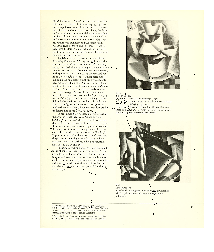

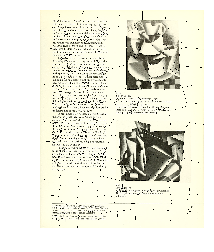

In [129]:
 # loop over the number of segments
for numSegments in (10,100):
    # apply SLIC and extract (approximately) the supplied number
    # of segments
    segments = slic(image, n_segments = numSegments, sigma = 5)

    # show the output of SLIC
    fig = plt.figure("Superpixels -- %d segments" % (numSegments))
    ax = fig.add_subplot(1, 1, 1)
    ax.imshow(mark_boundaries(image, segments,color=(0, 0, 0)))
    plt.axis("off")

# show the plots
plt.show()

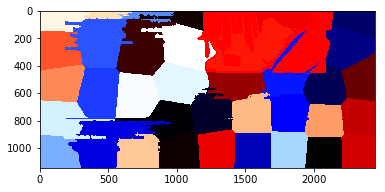

In [130]:
plt.imshow(segments[2100:6000,:],cmap='flag')


In [140]:
rnd_offset = 7
def centered_patch(image, m, n, width, offset=[0,0]):
    return image[int(m + offset[0] - width):
                 int(m + offset[0] + width),
                 int(n + offset[1] - width):
                 int(n + offset[1] + width)]
# np.max(segments)
for snum in range(0, np.max(segments)):
    spixel = np.where(segments == snum)
    mmin, nmin = list(map(min,spixel))
    mmax, nmax = list(map(max,spixel))
    
    m, n = int(mmin + (mmax - mmin)/2), int(nmin + (nmax - nmin)/2)
    width = min(mmax - mmin, nmax - nmin)/2
    offsets = [[0,0],
    [width * 2 + rnd.randint(-rnd_offset,rnd_offset),
     0 + rnd.randint(-rnd_offset,rnd_offset)],
    [0+ rnd.randint(-rnd_offset,rnd_offset),
     width * 2 + rnd.randint(-rnd_offset,rnd_offset)]]
    for idx, offset in enumerate(offsets):
        patch = centered_patch(image, m, n, width,offset)
        if (np.all(patch.shape[0:2] == width * 2)):
            patch = img_as_ubyte(patch)
            small = resize(patch, (32,32))
            plt.imsave('segments/patch{}_{}.png'.format(snum,idx),small)
    
    

/home/jakob/miniconda3/envs/ml/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/jakob/miniconda3/envs/ml/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [111]:
rnd.randint

<bound method Random.randint of <random.Random object at 0x1f5b2e8>>

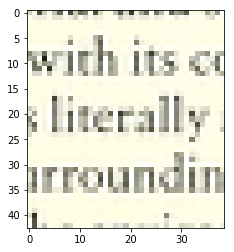

In [40]:
plt.imshow(image[mmin:mmax,nmin:nmax])

/home/jakob/miniconda3/envs/ml/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


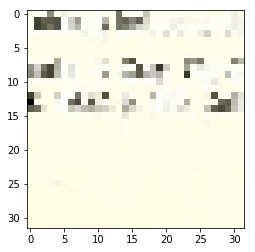

In [136]:
plt.imshow(resize(patch, (32,32)))

In [52]:
img_as_int?